# Imports 

In [ ]:
from pathlib import Path
import h5py
from typing import Tuple, Dict
import numpy as np
import matplotlib.pyplot as plt

SIM_PATH_LEGACY = Path("../data/results/salida_modelo_copy.h5")
print(SIM_PATH_LEGACY.resolve())  # Te muestra la ruta absoluta
print(SIM_PATH_LEGACY.exists())  # True si existe, False si no

# Utility

In [ ]:
def load_all_datasets(path: str | Path) -> Dict[str, np.ndarray]:
    """Carga todos los datasets de un archivo HDF5 plano (sin grupos)."""
    arrays: Dict[str, np.ndarray] = {}
    with h5py.File(path, "r") as f:
        for name, ds in f.items():
            if isinstance(ds, h5py.Dataset):
                arrays[name] = ds[:]  # pasar a numpy
    return arrays


def rename_h5_keys(file_path: Path, mapping: dict[str, str]) -> None:
    """Renames datasets or groups in an HDF5 file based on a mapping.

    Parameters
    ----------
    file_path : str
        Path to the .h5 file to modify.
    mapping : dict[str, str]
        Dictionary mapping old keys to new keys.
    """
    with h5py.File(file_path, "r+") as f:
        for old_key, new_key in mapping.items():
            if old_key in f:
                print(f"Renaming '{old_key}' → '{new_key}'")
                f.copy(f[old_key], new_key)
                del f[old_key]
            else:
                print(f"Key '{old_key}' not found — skipped.")

# Load

In [ ]:
# Abrir archivo en modo lectura
with h5py.File(SIM_PATH_LEGACY.resolve(), "r") as f:
    # Listar los grupos principales
    for key in f.keys():
        print(f[key])

data: Dict[str, np.ndarray] = load_all_datasets(SIM_PATH_LEGACY.resolve())

print(data.keys())

# Map data

In [ ]:
mapping = {
    "EUR": "eur_act",
    "biomasaAcumulada": "biomass_cum",
    "biomasaDiaria": "biomass_daily",
    "cEstresHidrico": "ceh",
    "cEstresHidricoRadiacion": "ceh_r",
    "evaporacion": "soil_evap",
    "porcAguaUtil": "p_au",
    "porcCobertura": "cover",
    "precipitacion_efectiva": "eff_precip",
    "profRaiz": "root_depth",
    "rendimiento": "yield_tensor",
    "transpiracion": "transpiration",
}

rename_h5_keys(SIM_PATH_LEGACY.resolve(), mapping)

In [ ]:
data_dict = load_all_datasets(SIM_PATH_LEGACY.resolve())
print(data.keys())

In [ ]:
keys_to_drop = [
    "ici",
    "drenaje",
    "diasDesdePrec",
    "percolacion_capa_1",
    "percolacion_capa_2",
    "percolacion_capa_3",
    "aguaUtilDisp1",
    "aguaUtilDisp2",
    "aguaUtilDisp3",
    "aguaUtilDisp4",
    "cEstrsTerminco",
]

data_dict_filtered = {k: v for k, v in data.items() if k not in keys_to_drop}

In [85]:
for key in data_dict_filtered.keys():
    print(key, data_dict_filtered[key].shape)
    data_array = data_dict_filtered[key][
        -5:, 0:3, 0:3
    ]  # Legacy:(T, W, H) -> New:(H, W, T)
    data_array = np.nan_to_num(data_array, nan=0.0)
    print(data_array)
    break
    print()

biomass_cum (181, 358, 278)
[[[   0.         1438.22557785 1310.27921755]
  [   0.            0.         1310.27921755]
  [   0.            0.            0.        ]]

 [[   0.         1438.22557785 1310.27921755]
  [   0.            0.         1310.27921755]
  [   0.            0.            0.        ]]

 [[   0.         1438.22557785 1310.27921755]
  [   0.            0.         1310.27921755]
  [   0.            0.            0.        ]]

 [[   0.         1438.22977168 1310.28341139]
  [   0.            0.         1310.28341139]
  [   0.            0.            0.        ]]

 [[   0.         1438.23878644 1310.29242615]
  [   0.            0.         1310.29242615]
  [   0.            0.            0.        ]]]


# Visualization

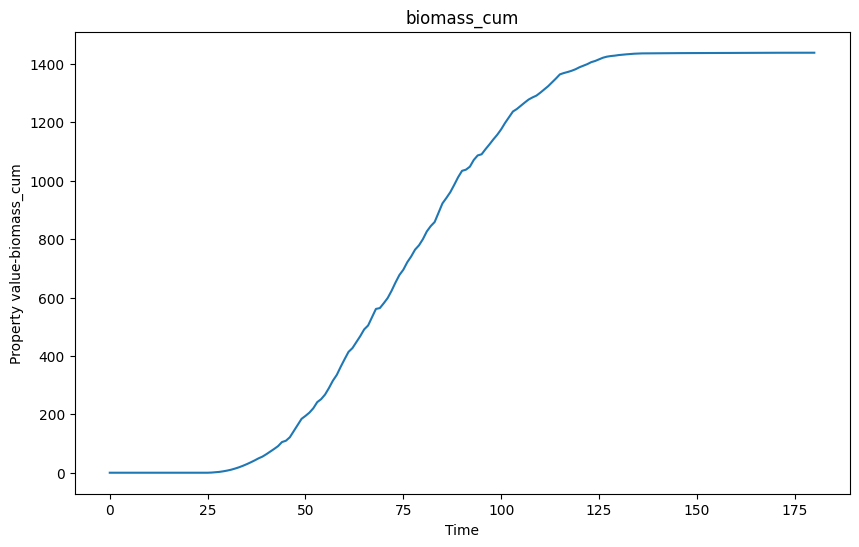

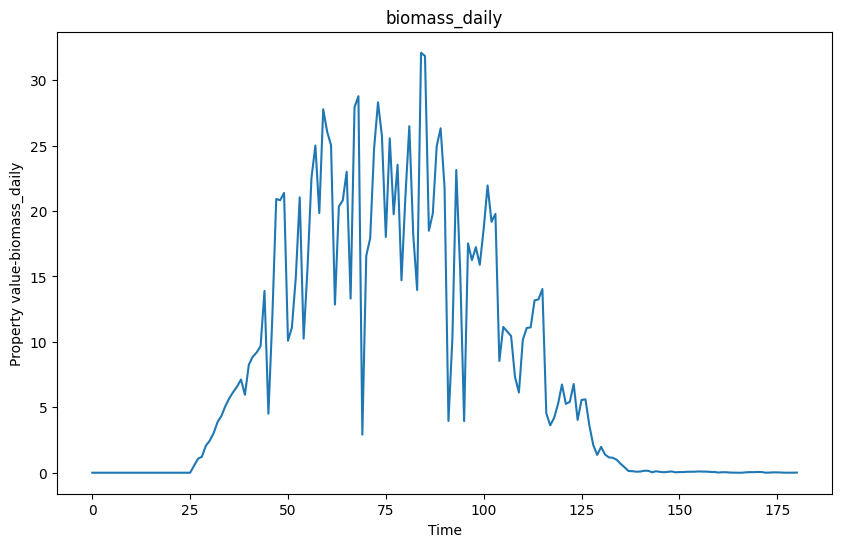

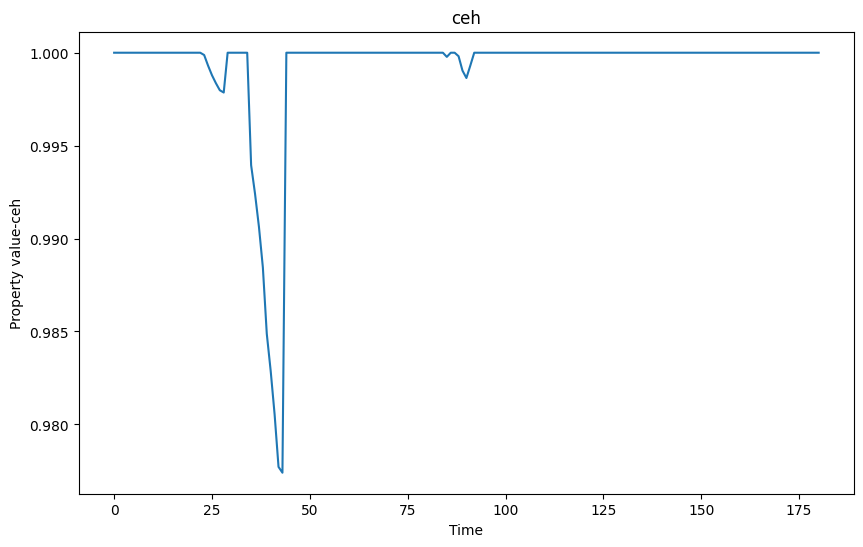

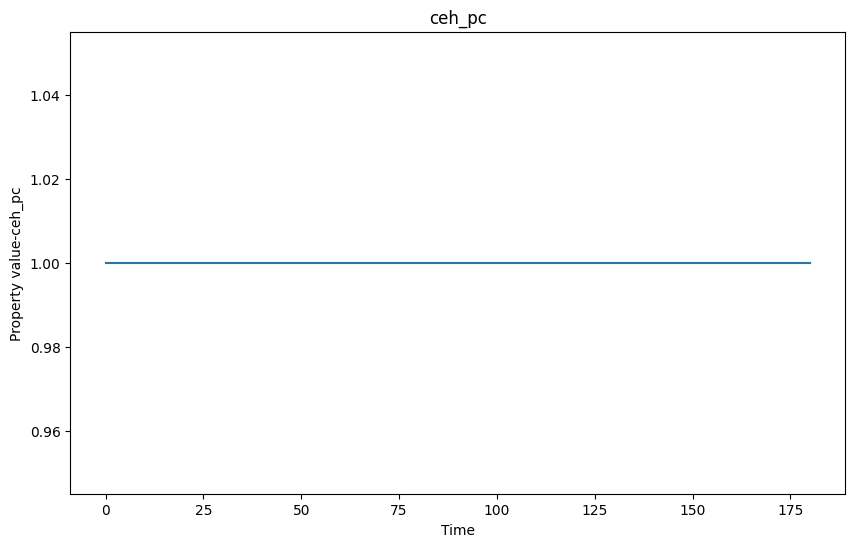

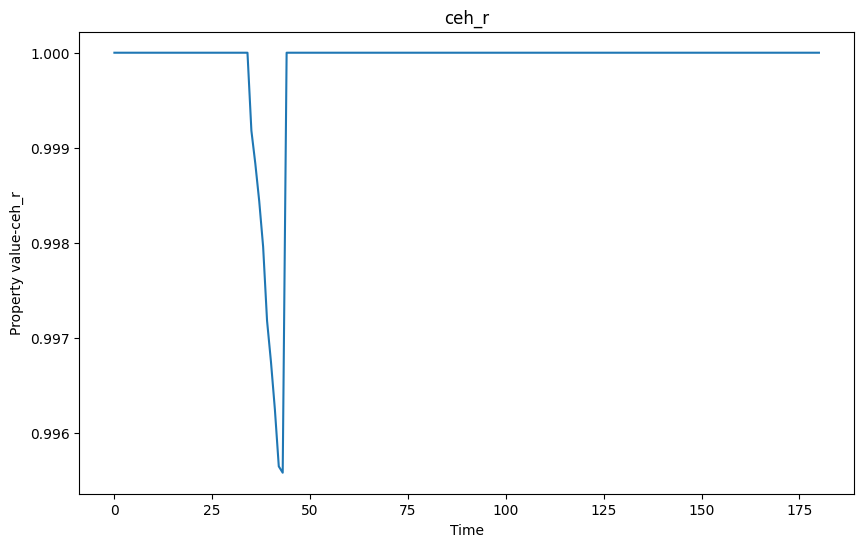

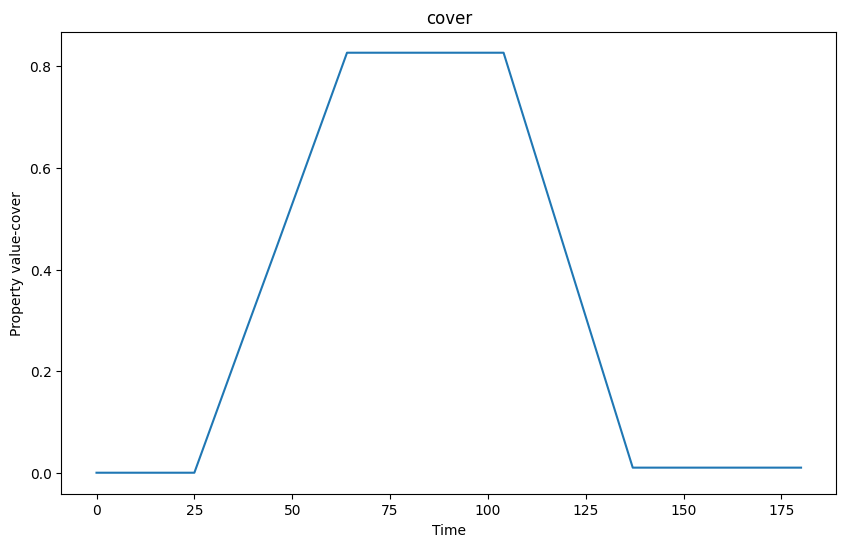

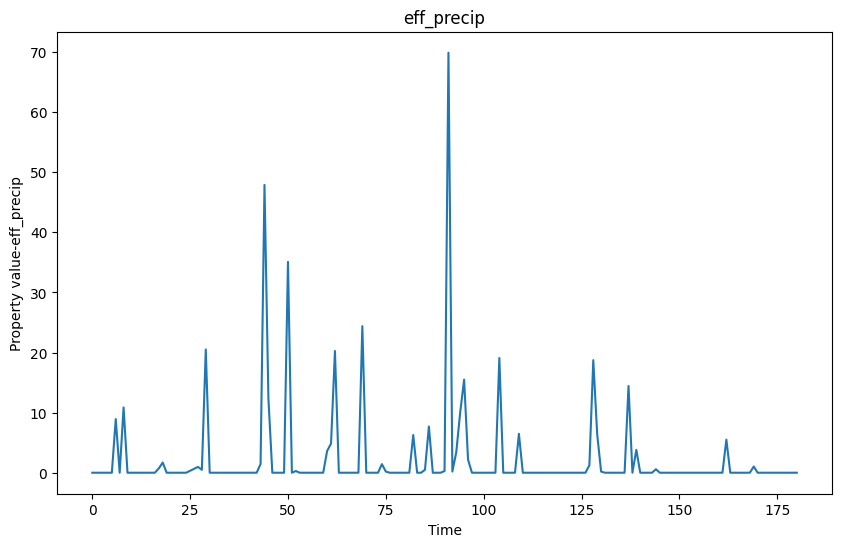

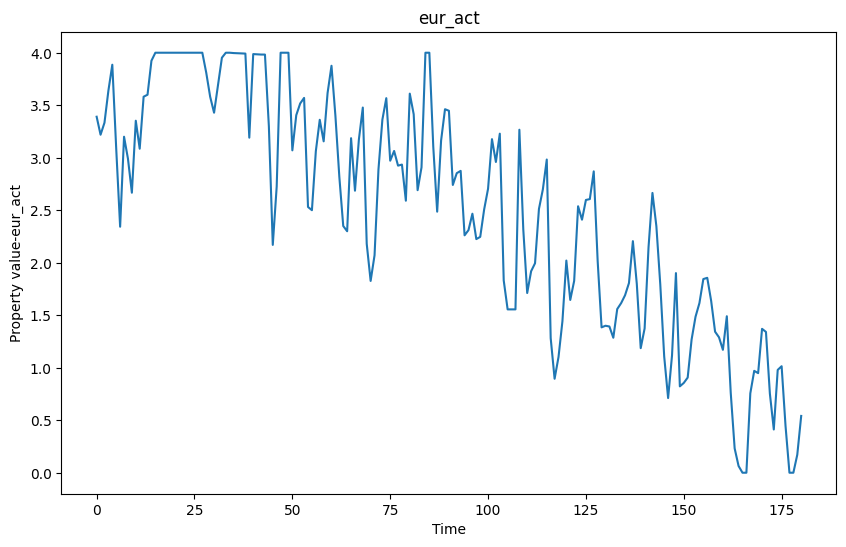

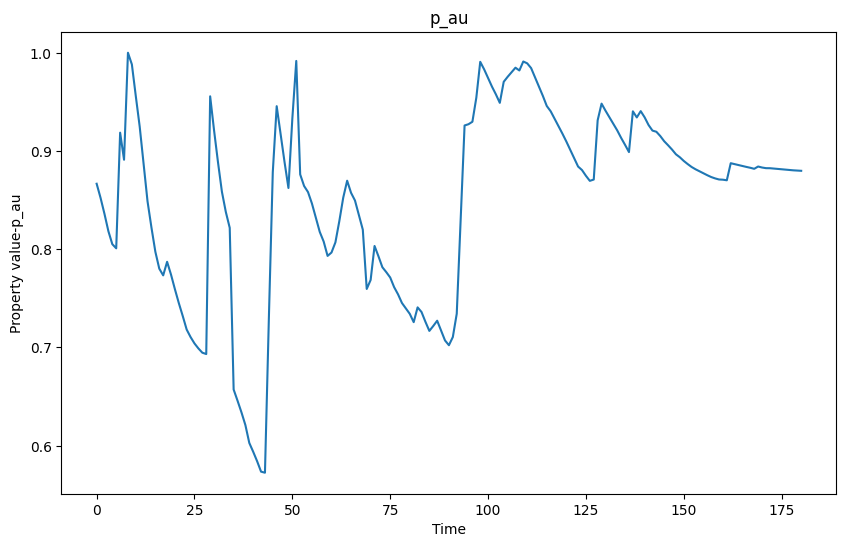

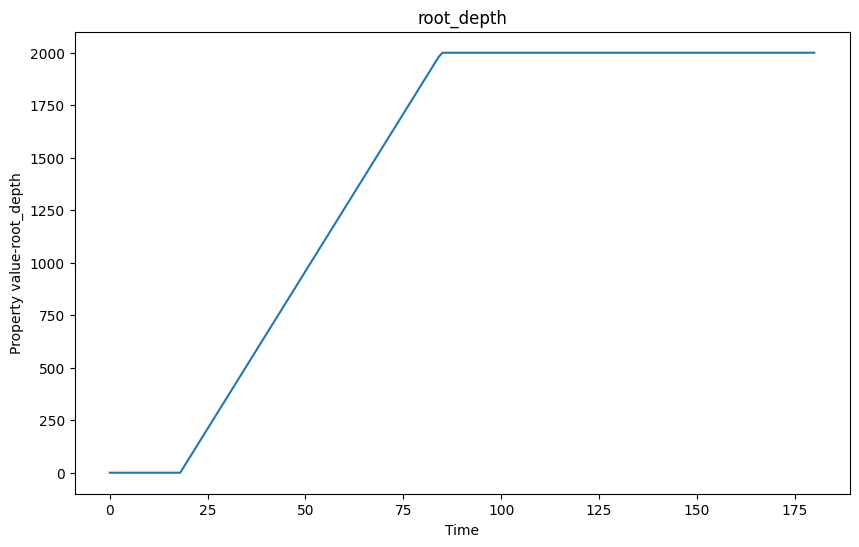

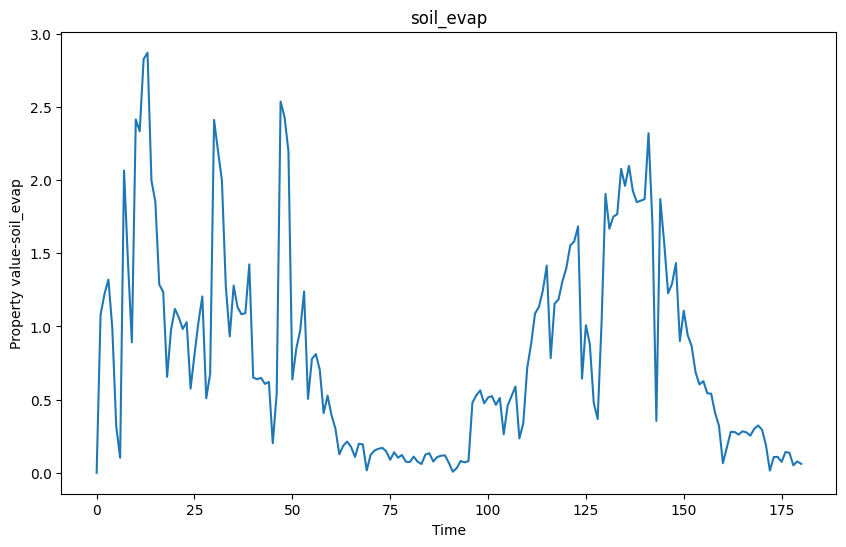

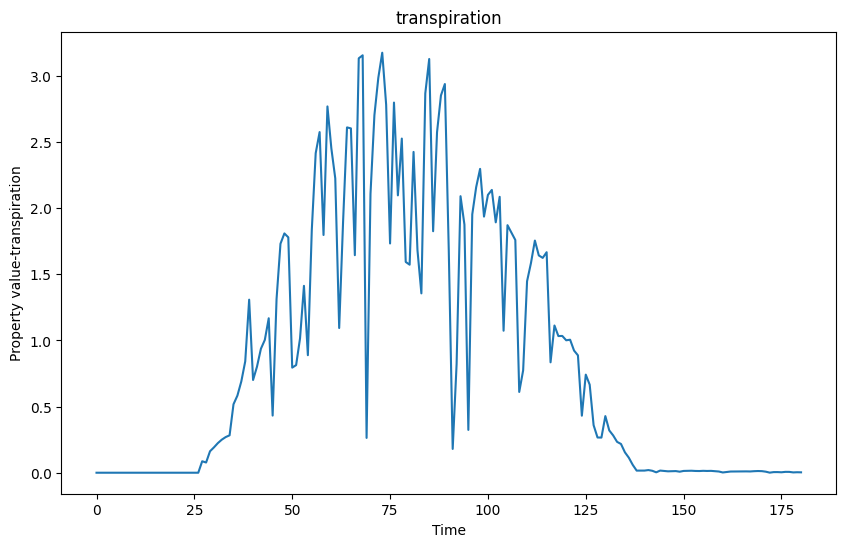

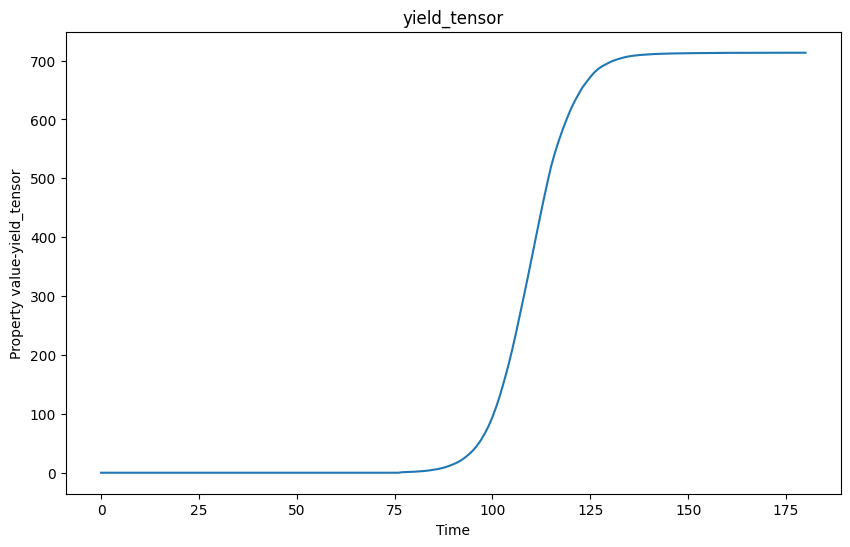

In [97]:
# data.shape = (278, 358, 181)
for key in data_dict_filtered.keys():
    t = np.arange(181)
    data_pixel = data_dict_filtered[key][:, 0, 1]

    plt.figure(figsize=(10, 6))
    plt.plot(
        t,
        data_pixel,
    )  # todas las curvas con baja opacidad
    plt.xlabel("Time")
    plt.ylabel(f"Property value-{key}")
    plt.title(f"{key}")
    plt.show()

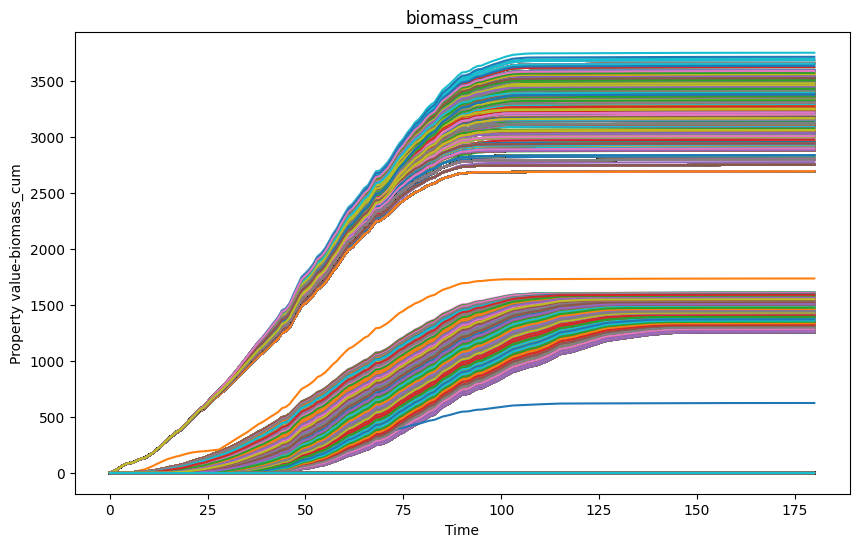

In [ ]:
key = "biomass_cum"
t = np.arange(181)

plt.figure(figsize=(10, 6))
for i in range(358):
    for j in range(278):
        data_pixel = data_dict_filtered[key][:, i, j]
        plt.plot(
            t,
            data_pixel,
        )

plt.xlabel("Time")
plt.ylabel(f"Property value-{key}")
plt.title(f"{key}")
plt.show()

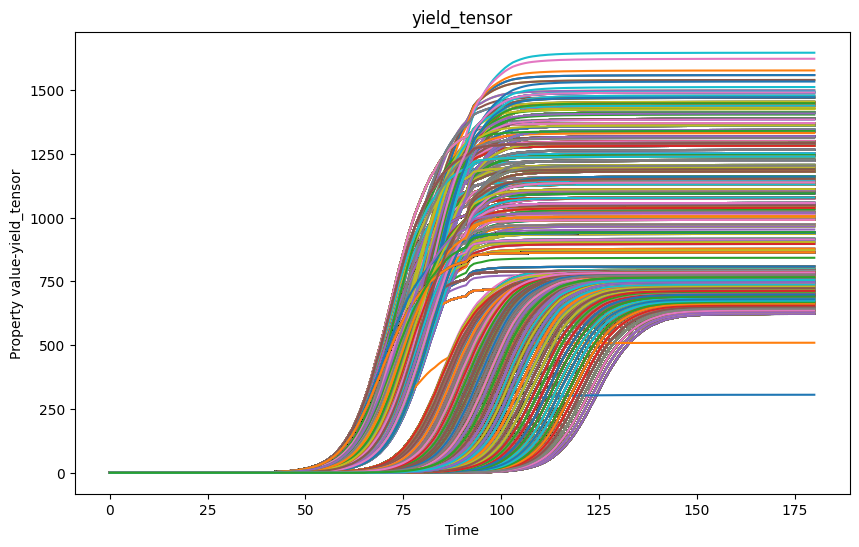

In [96]:
key = "yield_tensor"
t = np.arange(181)

plt.figure(figsize=(10, 6))
for i in range(358):
    for j in range(278):
        data_pixel = data_dict_filtered[key][:, i, j]
        plt.plot(
            t,
            data_pixel,
        )

plt.xlabel("Time")
plt.ylabel(f"Property value-{key}")
plt.title(f"{key}")
plt.show()

# Plot pixel

In [ ]:
key = "biomass_cum"


def plot_pixel_key(
    x: int,
    y: int,
    data_dict_filtered: Dict[str, np.ndarray],
    key: str = "biomass_cum",
):
    t = np.arange(181)
    plt.figure(figsize=(10, 6))
    data_pixel = data_dict_filtered[key][:, x, y]
    plt.plot(
        t,
        data_pixel,
    )
    plt.xlabel("Time")
    plt.ylabel(f"Property value-{key}")
    plt.title(f"{key}")
    plt.show()

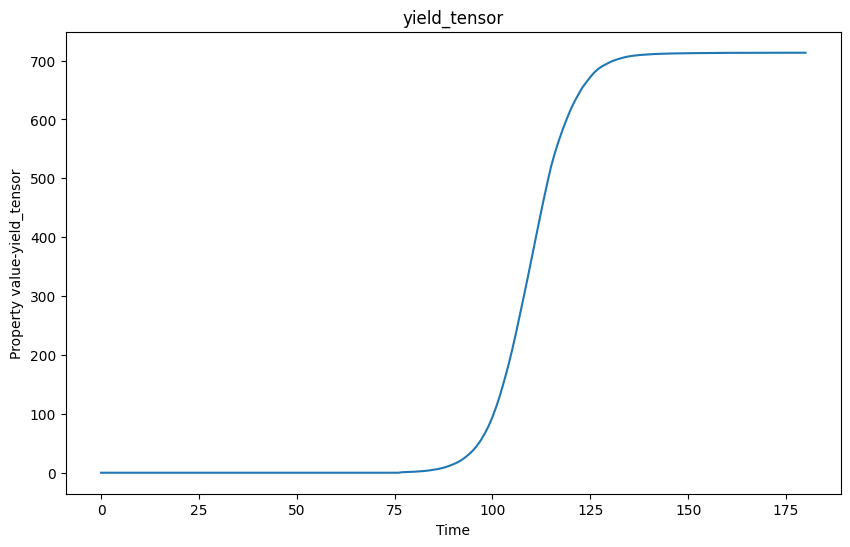

In [95]:
plot_pixel_key(0, 1, data_dict_filtered, key="yield_tensor")